# Module 1: Data Cleaning
## 1.1 Handling Missing Values
Some important and commonly used methods for imputing missing values:

### a. Mean/Median/Mode Imputation (Simple Imputation)

**When to use:** For numerical or categorical data with missing values that are missing at random.

**How it works:**

**Mean –** Replace missing value with the average (for continuous data).

**Median –** Better for skewed data.

**Mode –** For categorical variables.

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\Machine Learning\\Datasets\\Titanic-Dataset.csv")
print(df.head())

   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
df.shape

(891, 12)

In [4]:
# Check missing values
print(df.isnull().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


In [5]:
# Strategy 1: Drop rows
df_dropna = df.dropna(subset=['Age'])

In [6]:
df_dropna

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# Strategy 2: Mean/Median Imputation
# Mean/Median for numerical
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

In [8]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Mode for categorical
mode_imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = mode_imputer.fit_transform(df[['Embarked']]).ravel()
#df['Embarked'] = mode_imputer.fit_transform(df[['Embarked']])[:, 0]

In [10]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


### b. KNN Imputation
**When to Use KNN Imputer**

**Best for:**

- Numerical features with missing values.

- Data with patterns or correlations between variables.

- When mean/median imputation oversimplifies the data.

In [11]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Select relevant columns (exclude 'Name', 'Ticket', 'Cabin')
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df_knn = df[cols].copy()

# Encode categorical features
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df_knn['Sex'] = le_sex.fit_transform(df_knn['Sex'].astype(str))
df_knn['Embarked'] = le_embarked.fit_transform(df_knn['Embarked'].astype(str))

# Apply KNN imputer
imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_knn), columns=df_knn.columns)

# Optional: decode categories back
df_knn_imputed['Sex'] = le_sex.inverse_transform(df_knn_imputed['Sex'].round().astype(int))
df_knn_imputed['Embarked'] = le_embarked.inverse_transform(df_knn_imputed['Embarked'].round().astype(int))

df_knn_imputed.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1.0,female,38.0,1.0,0.0,71.2833,C
2,3.0,female,26.0,0.0,0.0,7.9250,S
3,1.0,female,35.0,1.0,0.0,53.1000,S
4,3.0,male,35.0,0.0,0.0,8.0500,S


In [12]:
df_knn_imputed.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### c. Forward Fill / Backward Fill

**When to Use It**

**Forward Fill is useful when:**
- You're working with time series data.

- Past values influence the present (e.g., stock prices, sensor readings).

- You assume the last valid observation holds until something new happens.

**Backward Fill is useful when:**
- You want to fill backward from future values.

- The missing value should reflect what’s coming (e.g., some schedules, future events).

- You're dealing with initial missing values and ffill won't fill them.

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
df['Cabin'] = df['Cabin'].ffill()

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [17]:
df['Cabin'] = df['Cabin'].bfill()

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


### d. Interpolation

**When to Use Interpolation**

**Use it when:**
- You’re working with numeric time series or continuous data (e.g. temperatures, stock prices, sensor readings).

- The data changes gradually, not abruptly.

- You want a smoother and more realistic fill than forward/backward fill or mean imputation

In [19]:
df['Age'] = df['Age'].interpolate(limit_direction='both')  # Fills start and end

### e. Regression Imputation

**Use regression imputation when:**
    
- The missing value is numeric.

- There is a correlation between the missing feature and other available features.

- You want to preserve relationships between variables (better than filling with an average).

- You’re okay with adding some model-based assumptions.

In [20]:
from sklearn.model_selection import train_test_split
df1 = pd.read_csv("C:\\Users\\hp\\Desktop\\Machine Learning\\Datasets\\Titanic-Dataset.csv")

df = df1.copy()

# Step 1: Select features that might help predict Age
features = ['Pclass', 'SibSp', 'Parch', 'Fare']
df_reg = df[features + ['Age']].copy()

# Step 2: Separate into known and missing Age
train_data = df_reg[df_reg['Age'].notnull()]
test_data = df_reg[df_reg['Age'].isnull()]

# Step 3: Fit regression model
reg = LinearRegression()
reg.fit(train_data[features], train_data['Age'])

# Step 4: Predict missing Age
predicted_ages = reg.predict(test_data[features])

# Step 5: Fill the missing Age values
df.loc[df['Age'].isnull(), 'Age'] = predicted_ages

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### f. MICE (Multiple Imputation by Chained Equations)

**Use MICE when:**

- You have multiple missing values across various features (especially when the data is multivariate).

- The relationships between the features are complex, and a simple mean or regression imputation might not be sufficient.

- You want to account for uncertainty in imputation (i.e., different plausible values for missing data).

- You want a statistical, model-based approach for imputation.

In [23]:
!pip install fancyimpute
from fancyimpute import IterativeImputer

# Load Titanic dataset
df2 = pd.read_csv("C:\\Users\\hp\\Desktop\\Machine Learning\\Datasets\\Titanic-Dataset.csv")

# Select relevant features (ignore non-numeric ones for now)
features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age']

# Apply MICE imputation to missing Age values
imputer = IterativeImputer(max_iter=10, random_state=42)
df2[features] = imputer.fit_transform(df2[features])

# Check the updated dataset
print(df2.head())

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   -----------------------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else s

ModuleNotFoundError: No module named 'fancyimpute'

## 1.2 Smoothing Noisy Data

Smoothing is a technique used to reduce noise or random variation in your data so patterns and trends become more visible. It's especially useful in time series, sensor data, or any data where random fluctuations can obscure real trends.

**Why Do We Need to Smooth Data?**

- To make trends clearer (e.g., in sales or stock price data).

- To reduce the effect of outliers or random spikes.

- To improve model performance (especially in models sensitive to fluctuations).

- To prepare for visualization (smoother curves = more readable plots).

**When to Use Smoothing**

- When your data has natural continuity (e.g., time series, sensor readings).

- You observe random spikes or dips that don’t reflect the underlying trend.

- You want to improve performance of models like regression or forecasting.


### Common Smoothing Techniques

#### a. Moving Average (Rolling Mean)

In [24]:
data = {'Day': pd.date_range(start='2023-01-01', periods=10),
        'Sales': [100, 105, 98, 120, 115, 117, 113, 140, 125, 130]}
df = pd.DataFrame(data)

In [25]:
df

,Day,Sales
0,2023-01-01,100
1,2023-01-02,105
2,2023-01-03,98
3,2023-01-04,120
4,2023-01-05,115
5,2023-01-06,117
6,2023-01-07,113
7,2023-01-08,140
8,2023-01-09,125
9,2023-01-10,130


In [26]:
# 3-day moving average
df['Sales_Smoothed'] = df['Sales'].rolling(window=3).mean()

In [27]:
df

,Day,Sales,Sales_Smoothed
0,2023-01-01,100,NaN
1,2023-01-02,105,NaN
2,2023-01-03,98,101.000000
3,2023-01-04,120,107.666667
4,2023-01-05,115,111.000000
5,2023-01-06,117,117.333333
6,2023-01-07,113,115.000000
7,2023-01-08,140,123.333333
8,2023-01-09,125,126.000000
9,2023-01-10,130,131.666667


#### b. Exponential Moving Average (EMA)

In [28]:
# Exponential smoothing
df['Sales_EMA'] = df['Sales'].ewm(span=2, adjust=False).mean()

In [29]:
df

,Day,Sales,Sales_Smoothed,Sales_EMA
0,2023-01-01,100,NaN,100.000000
1,2023-01-02,105,NaN,103.333333
2,2023-01-03,98,101.000000,99.777778
3,2023-01-04,120,107.666667,113.259259
4,2023-01-05,115,111.000000,114.419753
5,2023-01-06,117,117.333333,116.139918
6,2023-01-07,113,115.000000,114.046639
7,2023-01-08,140,123.333333,131.348880
8,2023-01-09,125,126.000000,127.116293
9,2023-01-10,130,131.666667,129.038764


#### c. Bin Smoothing (Discretization + Mean)

In [30]:
# Bin smoothing into 3 bins
df['Sales_Binned'] = pd.cut(df['Sales'], bins=3, labels=False)
df['Sales_Smoothed_Bin'] = df.groupby('Sales_Binned')['Sales'].transform('mean')

In [31]:
df

,Day,Sales,Sales_Smoothed,Sales_EMA,Sales_Binned,Sales_Smoothed_Bin
0,2023-01-01,100,NaN,100.000000,0,101.0
1,2023-01-02,105,NaN,103.333333,0,101.0
2,2023-01-03,98,101.000000,99.777778,0,101.0
3,2023-01-04,120,107.666667,113.259259,1,118.0
4,2023-01-05,115,111.000000,114.419753,1,118.0
5,2023-01-06,117,117.333333,116.139918,1,118.0
6,2023-01-07,113,115.000000,114.046639,1,118.0
7,2023-01-08,140,123.333333,131.348880,2,135.0
8,2023-01-09,125,126.000000,127.116293,1,118.0
9,2023-01-10,130,131.666667,129.038764,2,135.0


#### d. Savitzky-Golay Filter (SciPy)

In [32]:
from scipy.signal import savgol_filter

df['Sales_Savgol'] = savgol_filter(df['Sales'], window_length=5, polyorder=2)

In [33]:
df

,Day,Sales,Sales_Smoothed,Sales_EMA,Sales_Binned,Sales_Smoothed_Bin,Sales_Savgol
0,2023-01-01,100,NaN,100.000000,0,101.0,99.885714
1,2023-01-02,105,NaN,103.333333,0,101.0,102.457143
2,2023-01-03,98,101.000000,99.777778,0,101.0,106.314286
3,2023-01-04,120,107.666667,113.259259,1,118.0,112.285714
4,2023-01-05,115,111.000000,114.419753,1,118.0,119.028571
5,2023-01-06,117,117.333333,116.139918,1,118.0,112.714286
6,2023-01-07,113,115.000000,114.046639,1,118.0,122.428571
7,2023-01-08,140,123.333333,131.348880,2,135.0,128.428571
8,2023-01-09,125,126.000000,127.116293,1,118.0,130.514286
9,2023-01-10,130,131.666667,129.038764,2,135.0,129.171429


C:\Users\hp\AppData\Local\Temp\ipykernel_17600\2329753700.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Or try: 'ggplot', 'fivethirtyeight', 'bmh'
C:\Users\hp\AppData\Local\Temp\ipykernel_17600\2329753700.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


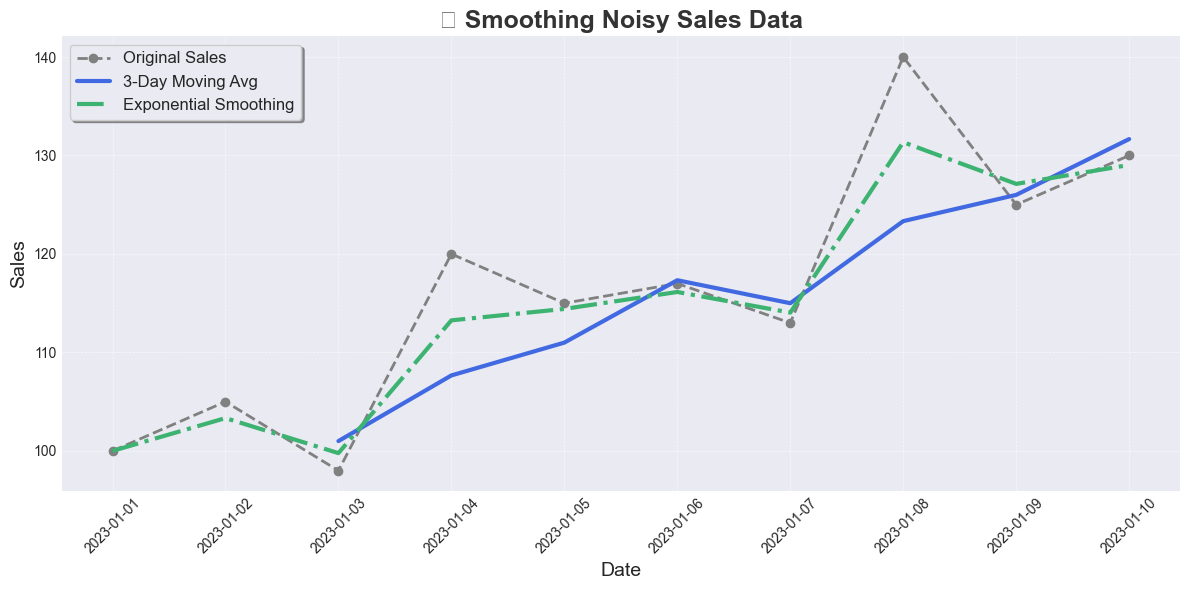

In [34]:
# Use a valid style
plt.style.use('seaborn-darkgrid')  # Or try: 'ggplot', 'fivethirtyeight', 'bmh'

# Set the plot size
plt.figure(figsize=(12, 6))

# Plot lines with different colors and styles
plt.plot(df['Day'], df['Sales'], label='Original Sales', color='gray', linewidth=2, linestyle='--', marker='o')
plt.plot(df['Day'], df['Sales_Smoothed'], label='3-Day Moving Avg', color='royalblue', linewidth=3)
plt.plot(df['Day'], df['Sales_EMA'], label='Exponential Smoothing', color='mediumseagreen', linewidth=3, linestyle='-.')

# Title and labels
plt.title("📊 Smoothing Noisy Sales Data", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)

# Grid and legend
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, frameon=True, shadow=True)

# X-ticks rotation
plt.xticks(rotation=45)

# Layout
plt.tight_layout()

# Show the plot
plt.show()

## 1.3 Data Inconsistencies

Inconsistencies happen when data entries don’t follow a standard format, conflict with each other, or contain incorrect values. These issues can mess with your analysis or machine learning models.

**Why Fix Inconsistencies?**

- To standardize data for reliable analysis.

- To avoid duplicated categories that ruin groupings.

- To ensure clean inputs for models and visualizations.

- To maintain data integrity across systems.

**How to Handle Inconsistencies in Python**
#### a. Standardize Text (Case, Spacing)

In [35]:
df3 = pd.DataFrame({'Sex': ['Male', 'male', 'MALE', 'Female', 'FEMALE']})

# Convert to lowercase and strip spaces
df3['Sex'] = df3['Sex'].str.lower().str.strip()

In [36]:
df3

,Sex
0,male
1,male
2,male
3,female
4,female


#### b. Typos or Misspellings

In [37]:
df4 = pd.DataFrame({'Department': ['Enginering', 'Engineering', 'Eng', 'engineering']})

In [38]:
df4['Department'] = df4['Department'].replace({
    'Enginering': 'Engineering',
    'Eng': 'Engineering',
    'engineering': 'Engineering'
})
df4

,Department
0,Engineering
1,Engineering
2,Engineering
3,Engineering


In [43]:
!pip install fuzzywuzzy
from fuzzywuzzy import process

choices = df4['Department'].unique()
print(process.extract("Enginering", choices, limit=3))

[('Engineering', 95)]



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


#### c. Units and Scale Inconsistencies

In [44]:
df5 = pd.DataFrame({'Height': ['180 cm', '1.8 m', '175 cm', '1.75 m']})

In [45]:
def convert_height(val):
    if 'cm' in val:
        return float(val.replace(' cm', '')) / 100
    elif 'm' in val:
        return float(val.replace(' m', ''))
    return np.nan

df5['Height_m'] = df5['Height'].apply(convert_height)

In [46]:
df5

,Height,Height_m
0,180 cm,1.80
1,1.8 m,1.80
2,175 cm,1.75
3,1.75 m,1.75


#### d. Date Format Inconsistencies

In [47]:
df6 = pd.DataFrame({
    'Date': ['2023-01-05', '05/01/2023', 'Jan 5, 2023', 'invalid', ' ']
})

In [48]:
from dateutil.parser import parse

def safe_parse(val):
    try:
        return parse(val, dayfirst=True)
    except:
        return np.nan

df6['Date'] = df6['Date'].apply(safe_parse)

In [49]:
df6

,Date
0,2023-05-01
1,2023-01-05
2,2023-01-05
3,NaT
4,NaT


#### e. Conflicting Logical Values

In [50]:
df7 = pd.DataFrame({
    'Age': [5, 34, 40],
    'Job': ['Manager', 'Engineer', 'Artist']
})

In [51]:
# Flag or review suspicious rows
df7[df7['Age'] < 10]

,Age,Job
0,5,Manager


## 1.4 Outliers

Outliers are data points that significantly differ from the rest of the data. They may be unusually high or low values and can be caused by:

- Data entry errors

- Measurement errors

- True anomalies (e.g. fraudulent transactions, rare diseases)

It is also known as:
- Deviants
- Abnormalities
- Anaomalous Points
- Abberrant Observations

**Types of Outliers**

**1. Point Outliers**
A single data point far from the rest.

📌 Example: A student score of 300 in a dataset where the max is 100.

**2. Contextual (Conditional) Outliers**
Outliers only in certain contexts.

📌 Example: 10°C is normal in Canada in winter, but an outlier in Pakistan.

**3. Collective Outliers**
A group of data points that deviate together.

📌 Example: A series of suspicious financial transactions.

**What Outliers Can Cause or Do**

- **1. Mislead Machine Learning Models**
  - Algorithms like Linear Regression try to minimize the error. A single outlier can shift the regression line.   
  - Outliers can cause poor decision boundaries, leading to misclassifications.


- **2. Reduce Model Accuracy and Generalization**
  - Models may overfit or underperform when trying to account for outliers.
  - Outliers introduce noise, making the model learn patterns that don’t generalize well.
  
  
- **3. Impact Clustering Algorithms**
  - Distance-based algorithms like K-Means are highly sensitive to outliers.
  
  
- **4. Waste Computational Resources**
  - Models may spend unnecessary time trying to fit or interpret noisy data points.
  
  
- **5. Mislead Visualizations**
  - Plots like histograms or scatter plots can look very skewed due to outliers, hiding patterns in the data.
  
  
- **6. Distort Statistical Measures**
  - They skew the mean, inflate the standard deviation, and distort correlations.

**How to Detect Outliers**

Outliers can be detected using:
1. Statistical Methods
2. Visualization Methods
3. Machine Learning-Based Methods

**1. 📏 Statistical Methods**

**a. Z-Score Method (Standard Score)**
- Measures how many standard deviations a data point is from the mean.
- If |Z| > 3 (common threshold), it's an outlier.

In [55]:
from scipy import stats

# Step 1: Generate some sample data (with a few outliers)
np.random.seed(42)
data = np.random.normal(50, 10, 100)  # 100 data points around mean=50, std=10
data = np.append(data, [120, 130, 140])  # Add outliers

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Step 2: Calculate Z-scores
df['Z-Score'] = stats.zscore(df['Value'])

# Step 3: Set a threshold (commonly 3)
threshold = 3

# Step 4: Identify outliers
df['Outlier'] = df['Z-Score'].apply(lambda x: abs(x) > threshold)

# Step 5: Separate inliers and outliers
inliers = df[df['Outlier'] == False]
outliers = df[df['Outlier'] == True]

# Print results
print("=== Outliers Detected ===")
print(outliers)

print("\n=== Cleaned Data (Inliers) ===")
print(inliers)

=== Outliers Detected ===
     Value   Z-Score  Outlier
100  120.0  4.203638     True
101  130.0  4.815716     True
102  140.0  5.427794     True

=== Cleaned Data (Inliers) ===
        Value   Z-Score  Outlier
0   54.967142  0.223119    False
1   48.617357 -0.165538    False
2   56.476885  0.315527    False
3   65.230299  0.851304    False
4   47.658466 -0.224229    False
..        ...       ...      ...
95  35.364851 -0.976695    False
96  52.961203  0.100339    False
97  52.610553  0.078877    False
98  50.051135 -0.077779    False
99  47.654129 -0.224495    False

[100 rows x 3 columns]


C:\Users\hp\AppData\Local\Temp\ipykernel_17600\2217359481.py:30: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


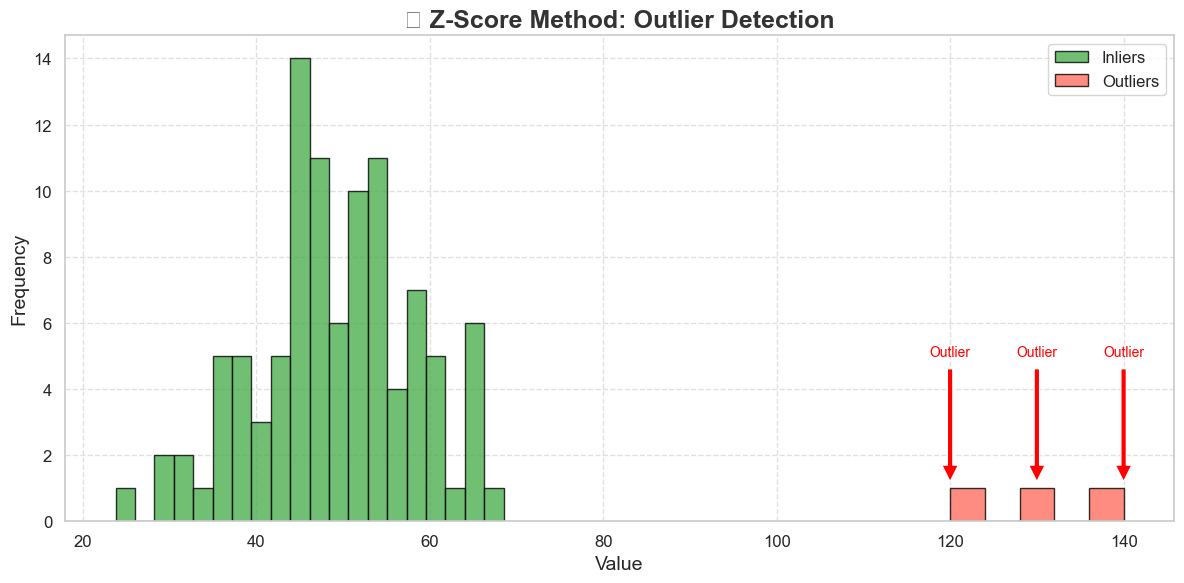

In [57]:
# Set seaborn style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))
plt.title('💡 Z-Score Method: Outlier Detection', fontsize=18, fontweight='bold', color='#333')

# Histogram for inliers
plt.hist(inliers['Value'], bins=20, alpha=0.8, label='Inliers', color='#4CAF50', edgecolor='black')

# Histogram for outliers
plt.hist(outliers['Value'], bins=5, alpha=0.8, label='Outliers', color='#FF6F61', edgecolor='black')

# Add labels and legend
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12, frameon=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a subtle grid
plt.grid(True, linestyle='--', alpha=0.6)

# Optional annotation (adds charm)
for x in outliers['Value']:
    plt.annotate('Outlier', xy=(x, 1), xytext=(x, 5),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=10, color='red', ha='center')

plt.tight_layout()
plt.show()

**b. What Is the IQR Method?**

- The Interquartile Range (IQR) method is a statistical technique used to detect outliers in a dataset by analyzing how far values fall from the central 50% of the data (the “middle spread”).

- It's a robust method, meaning it's not heavily affected by extreme values (unlike the mean and standard deviation used in Z-Score).

**Formula for Outlier Detection**

- IQR = Q3 (75%) − Q1 (25%)
- Lower bound = Q1 - 1.5 × IQR
- Upper bound = Q3 + 1.5 × IQR

A data point is an outlier if it is:
- 𝑥 < 𝑄1 − 1.5 * 𝐼𝑄𝑅 

**OR**
- 𝑥 > 𝑄3 + 1.5 * 𝐼𝑄𝑅

=== Outliers Detected ===
          Value  Outlier
74    23.802549     True
100  120.000000     True
101  130.000000     True
102  140.000000     True


C:\Users\hp\AppData\Local\Temp\ipykernel_17600\1699674338.py:54: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


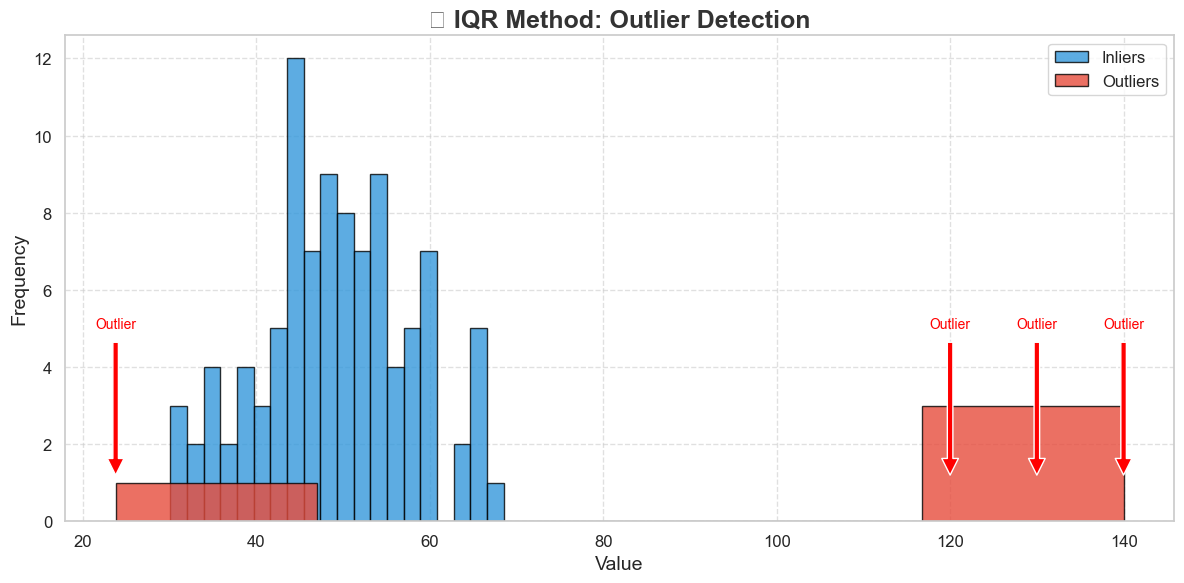

In [59]:
# Step 1: Generate sample data (with outliers)
np.random.seed(42)
data = np.random.normal(50, 10, 100)  # Normally distributed data
data = np.append(data, [120, 130, 140])  # Add a few outliers

# Create DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Step 2: Calculate Q1, Q3, and IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
df['Outlier'] = df['Value'].apply(lambda x: x < lower_bound or x > upper_bound)

# Step 4: Separate inliers and outliers
inliers = df[df['Outlier'] == False]
outliers = df[df['Outlier'] == True]

# Print summary
print("=== Outliers Detected ===")
print(outliers)

# Step 5: Attractive Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('📊 IQR Method: Outlier Detection', fontsize=18, fontweight='bold', color='#333')

# Plot inliers
plt.hist(inliers['Value'], bins=20, alpha=0.8, label='Inliers', color='#3498db', edgecolor='black')

# Plot outliers
plt.hist(outliers['Value'], bins=5, alpha=0.8, label='Outliers', color='#e74c3c', edgecolor='black')

# Labels and grid
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12, frameon=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Optional annotation
for x in outliers['Value']:
    plt.annotate('Outlier', xy=(x, 1), xytext=(x, 5),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=10, color='red', ha='center')

plt.tight_layout()
plt.show()

**2. 📊 Visualization Methods** 

**a. Boxplot**

C:\Users\hp\AppData\Local\Temp\ipykernel_17600\599091954.py:38: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


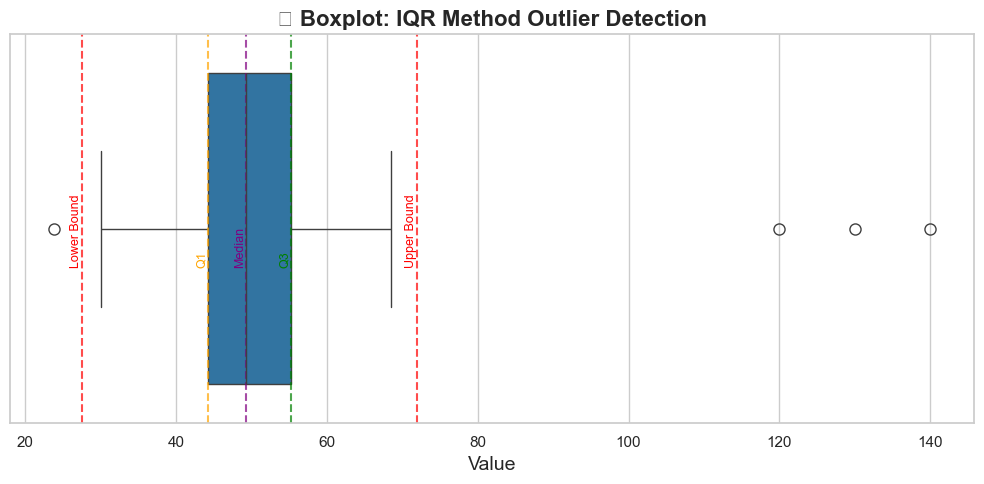

In [61]:
# Generate sample data
np.random.seed(42)
data = np.random.normal(50, 10, 100)
data = np.append(data, [120, 130, 140])  # Intentional outliers

# Create DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Set Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Value', data=df, color="#1f77b4", fliersize=8)

# Plot title and label
plt.title("📦 Boxplot: IQR Method Outlier Detection", fontsize=16, fontweight='bold')
plt.xlabel("Value", fontsize=14)
plt.yticks([])

# Annotate median, Q1, Q3, bounds
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median = df['Value'].median()

# Draw vertical reference lines
for val, label, color in zip(
    [lower_bound, Q1, median, Q3, upper_bound],
    ['Lower Bound', 'Q1', 'Median', 'Q3', 'Upper Bound'],
    ['red', 'orange', 'purple', 'green', 'red']
):
    plt.axvline(val, linestyle='--', color=color, alpha=0.7)
    plt.text(val, 0.1, label, rotation=90, color=color, verticalalignment='bottom', horizontalalignment='right', fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_17600\819275093.py:34: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_17600\819275093.py:34: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


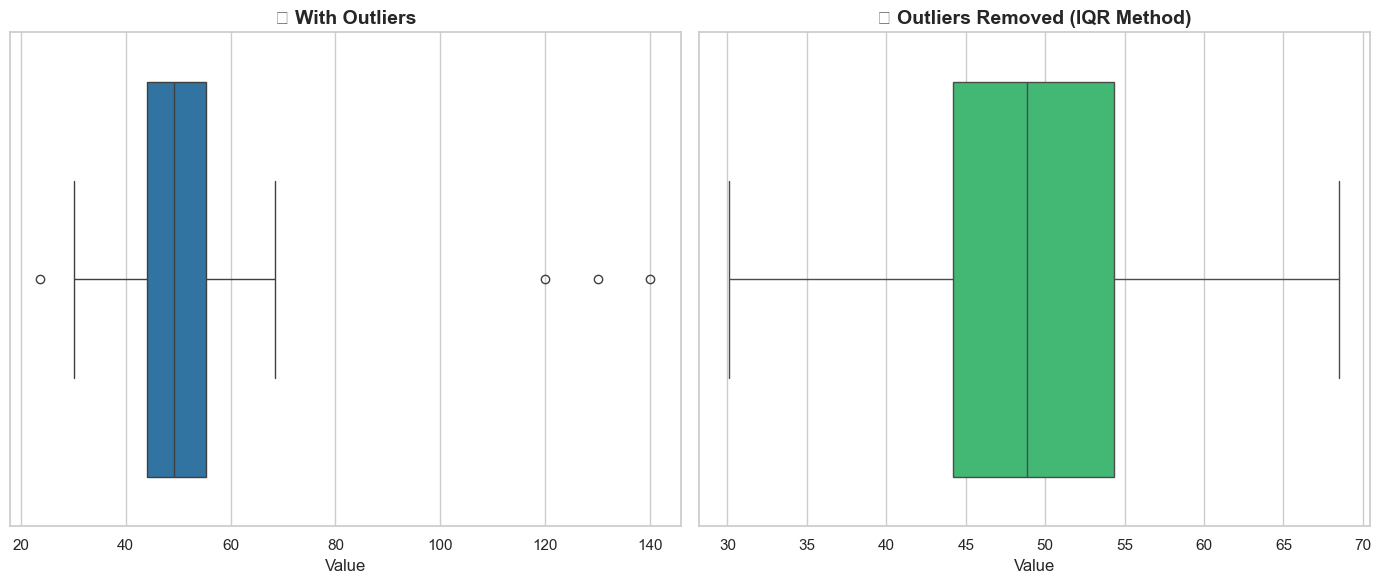

In [63]:
np.random.seed(42)
data = np.random.normal(50, 10, 100)
data = np.append(data, [120, 130, 140])  # Add outliers

# Step 2: Create DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Step 3: Calculate IQR and bounds
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Remove outliers
df_cleaned = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

# Step 5: Plot boxplots side by side
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Boxplot with outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='Value', data=df, color="#1f77b4")
plt.title("📦 With Outliers", fontsize=14, fontweight='bold')
plt.xlabel("Value")

# Boxplot without outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='Value', data=df_cleaned, color="#2ecc71")
plt.title("✅ Outliers Removed (IQR Method)", fontsize=14, fontweight='bold')
plt.xlabel("Value")

plt.tight_layout()
plt.show()


**b. Histogram**

C:\Users\hp\AppData\Local\Temp\ipykernel_17600\3251452130.py:37: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Temp\ipykernel_17600\3251452130.py:37: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


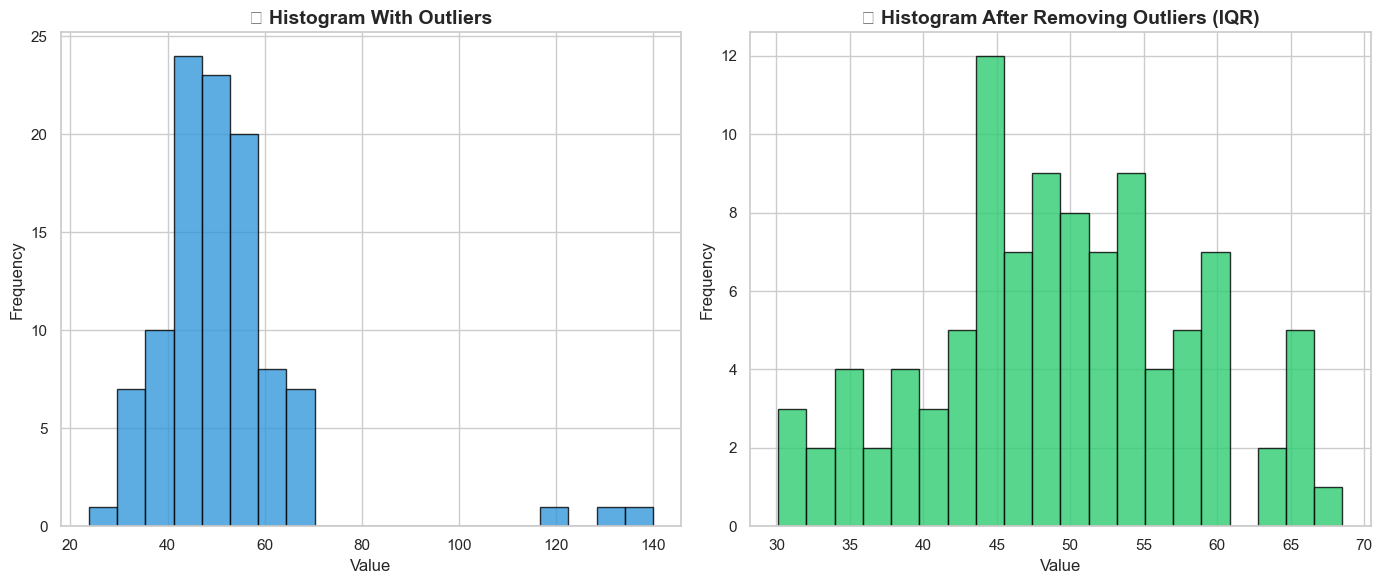

In [64]:
# Step 1: Generate data with outliers
np.random.seed(42)
data = np.random.normal(50, 10, 100)
data = np.append(data, [120, 130, 140])  # Add outliers

# Step 2: Create DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Step 3: Compute IQR and bounds
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter out outliers
df_cleaned = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

# Step 5: Plot both histograms
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Histogram with outliers
plt.subplot(1, 2, 1)
plt.hist(df['Value'], bins=20, color='#3498db', edgecolor='black', alpha=0.8)
plt.title("📊 Histogram With Outliers", fontsize=14, fontweight='bold')
plt.xlabel("Value")
plt.ylabel("Frequency")

# Histogram without outliers
plt.subplot(1, 2, 2)
plt.hist(df_cleaned['Value'], bins=20, color='#2ecc71', edgecolor='black', alpha=0.8)
plt.title("✅ Histogram After Removing Outliers (IQR)", fontsize=14, fontweight='bold')
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**c. Scatter Plot**

C:\Users\hp\AppData\Local\Temp\ipykernel_17600\3492793872.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(outliers['Index'], outliers['Value'], color='#e74c3c', label='Outliers', s=80, edgecolor='black', marker='x')
C:\Users\hp\AppData\Local\Temp\ipykernel_17600\3492793872.py:39: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


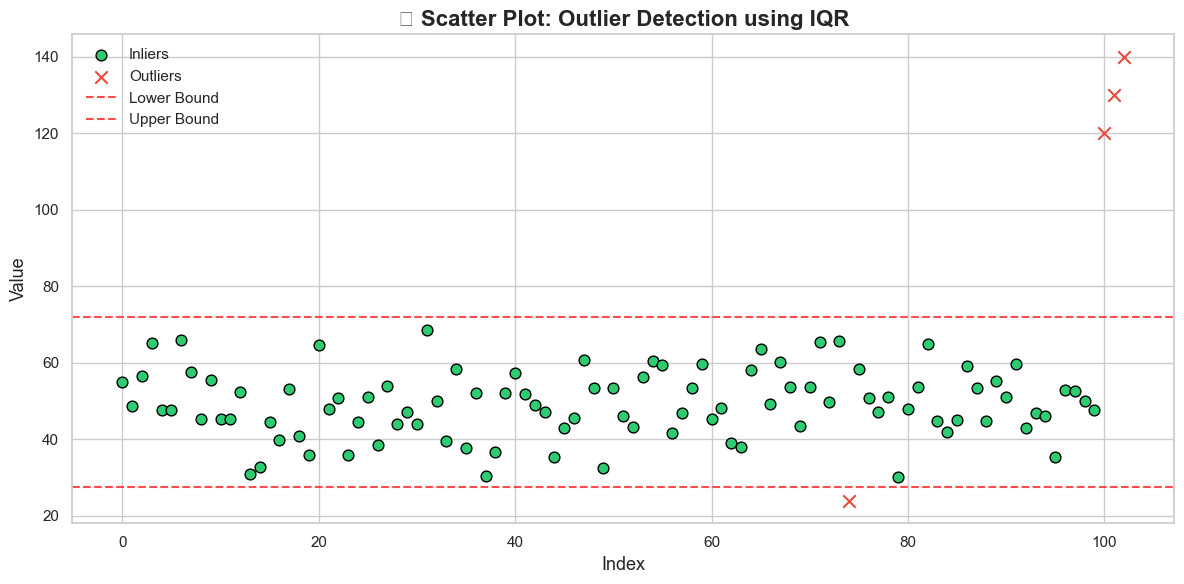

In [65]:
# Step 1: Generate sample data with outliers
np.random.seed(42)
data = np.random.normal(50, 10, 100)
data = np.append(data, [120, 130, 140])  # Intentional outliers

# Step 2: Create DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Step 3: Compute IQR and bounds
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Identify outliers
df['Index'] = df.index
df['Outlier'] = df['Value'].apply(lambda x: x < lower_bound or x > upper_bound)

# Step 5: Plot scatter with outliers highlighted
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title("🔎 Scatter Plot: Outlier Detection using IQR", fontsize=16, fontweight='bold')

# Inliers
inliers = df[df['Outlier'] == False]
plt.scatter(inliers['Index'], inliers['Value'], color='#2ecc71', label='Inliers', s=60, edgecolor='black')

# Outliers
outliers = df[df['Outlier'] == True]
plt.scatter(outliers['Index'], outliers['Value'], color='#e74c3c', label='Outliers', s=80, edgecolor='black', marker='x')

# Plot details
plt.axhline(lower_bound, linestyle='--', color='red', alpha=0.7, label='Lower Bound')
plt.axhline(upper_bound, linestyle='--', color='red', alpha=0.7, label='Upper Bound')
plt.xlabel("Index", fontsize=13)
plt.ylabel("Value", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

**3. 🧠 Machine Learning-Based Methods**

**a. Isolation Forest (Good for high-dimensional data)**

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Local\Temp\ipykernel_17600\3471279262.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(outliers['Index'], outliers['Value'], color='#e74c3c', label='Outliers', s=80, edgecolor='black', marker='x')
C:\Users\hp\AppData\Local\Temp\ipykernel_17600\3471279262.py:39: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Gly

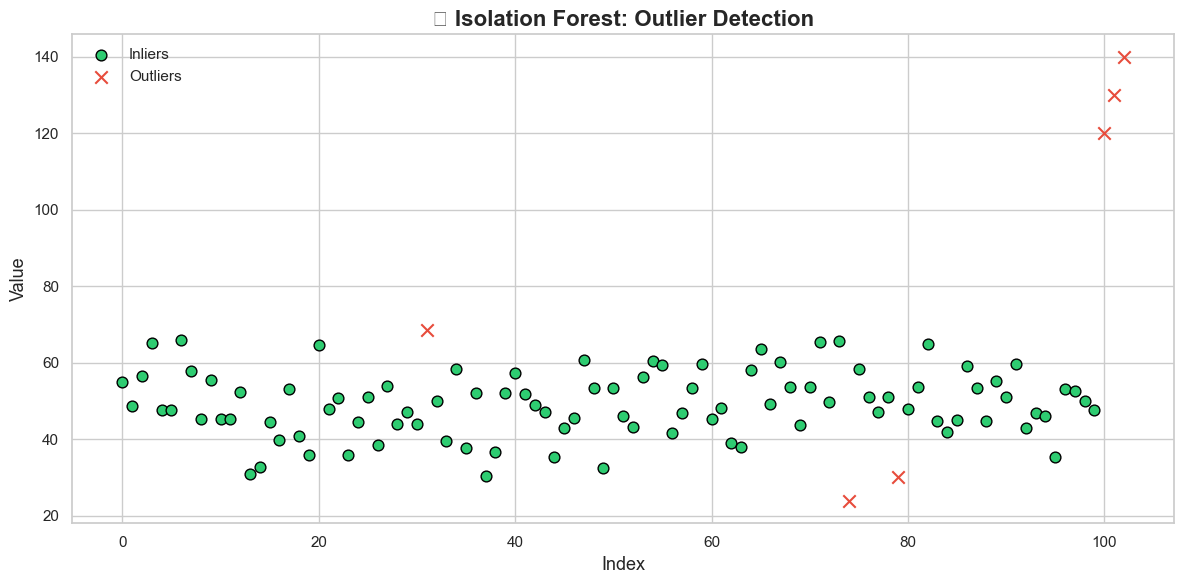

In [66]:
from sklearn.ensemble import IsolationForest

# Step 1: Generate data with outliers
np.random.seed(42)
data = np.random.normal(50, 10, 100).reshape(-1, 1)
outliers = np.array([[120], [130], [140]])
data_combined = np.vstack((data, outliers))

# Step 2: Create DataFrame
df = pd.DataFrame(data_combined, columns=['Value'])

# Step 3: Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df[['Value']])
df['Score'] = iso_forest.decision_function(df[['Value']])

# Anomaly: -1 = outlier, 1 = inlier
df['Is_Outlier'] = df['Anomaly'] == -1
df['Index'] = df.index

# Step 4: Separate inliers and outliers
inliers = df[df['Is_Outlier'] == False]
outliers = df[df['Is_Outlier'] == True]

# Step 5: Plot results
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title("🌲 Isolation Forest: Outlier Detection", fontsize=16, fontweight='bold')

# Inliers
plt.scatter(inliers['Index'], inliers['Value'], color='#2ecc71', label='Inliers', s=60, edgecolor='black')

# Outliers
plt.scatter(outliers['Index'], outliers['Value'], color='#e74c3c', label='Outliers', s=80, edgecolor='black', marker='x')

plt.xlabel("Index", fontsize=13)
plt.ylabel("Value", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

**b. DBSCAN Clustering**

C:\Users\hp\AppData\Local\Temp\ipykernel_17600\958945752.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(outliers['Index'], outliers['Value'], c='red', s=80, marker='x', label='Outliers', edgecolor='black')
C:\Users\hp\AppData\Local\Temp\ipykernel_17600\958945752.py:44: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from current font.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


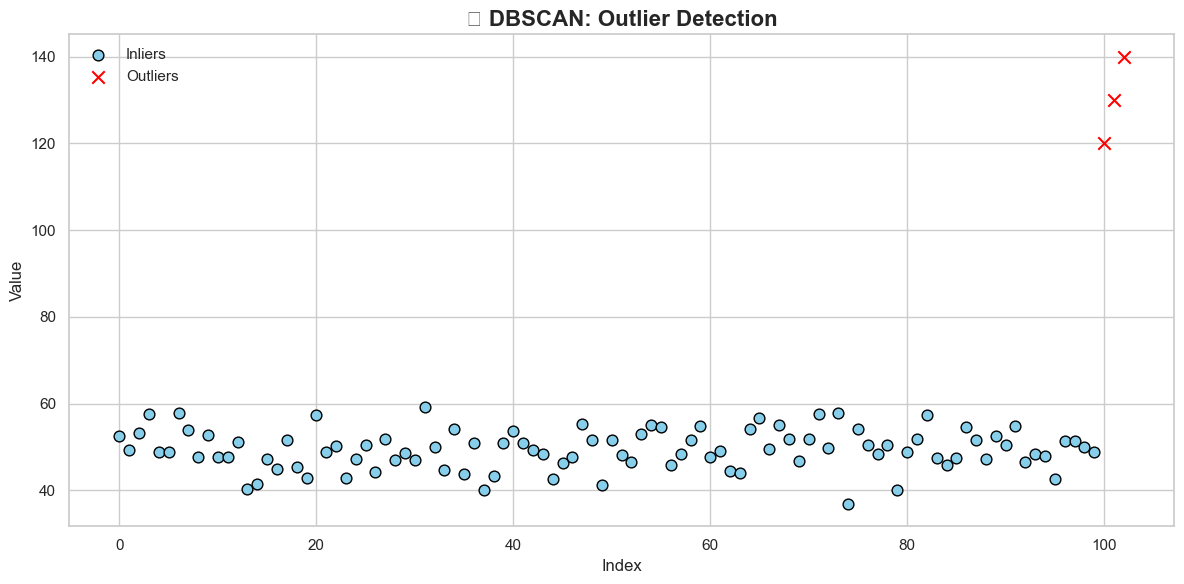

In [67]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Generate data
np.random.seed(42)
data = np.random.normal(50, 5, 100)
data = np.append(data, [120, 130, 140])  # Add outliers
data = data.reshape(-1, 1)

# Step 2: Standardize the data (important for DBSCAN)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
db.fit(data_scaled)

# Step 4: Extract results
labels = db.labels_
# -1 means "noise" (outliers)
df = pd.DataFrame({
    'Value': data.flatten(),
    'Label': labels,
    'Index': range(len(data))
})
df['Is_Outlier'] = df['Label'] == -1

# Step 5: Visualize
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title("🧪 DBSCAN: Outlier Detection", fontsize=16, fontweight='bold')

# Inliers (Clustered)
inliers = df[df['Is_Outlier'] == False]
plt.scatter(inliers['Index'], inliers['Value'], c='skyblue', s=60, label='Inliers', edgecolor='black')

# Outliers (Noise)
outliers = df[df['Is_Outlier'] == True]
plt.scatter(outliers['Index'], outliers['Value'], c='red', s=80, marker='x', label='Outliers', edgecolor='black')

plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()